In [9]:
import pandas as pd

data_gemma = pd.read_csv('/home/mmezzanzanica/project/scoring_autoint_align/3_analysis/ndcg_all_layers_gemma.csv')
data_gemma

,index,description,layer,ndcg_bilingual_embedding,ndcg_Alibaba-NLP/gte-Qwen2-7B-instruct,ndcg_Qwen/Qwen3-Embedding-8B,ndcg_Qwen/Qwen3-Embedding-0.6B,ndcg_Qwen/Qwen3-Embedding-4B
0,0,references to musical or measurement instruments,0,0.000794,0.007579,0.000093,0.001068,0.003142
1,1,"occurrences of the word ""render"" and its rela...",0,0.002658,0.023059,0.000710,0.002559,0.006658
2,2,terms related to risk assessment in health con...,0,0.054544,0.028537,0.064655,0.056377,0.053902
3,3,mentions of experimental processes and desert-...,0,0.031566,0.003155,0.003512,0.004370,0.003353
4,4,the concept of hybrids in various contexts,0,0.002457,0.008454,0.008869,0.009355,0.003495
...,...,...,...,...,...,...,...,...
81915,16379,programming syntax and structure,41,0.090763,0.094841,0.079562,0.064868,0.069696
81916,16380,references to familial and legal relationships,41,0.081431,0.147751,0.116126,0.163841,0.136308
81917,16381,concepts related to legal theories and arguments,41,0.052325,0.053305,0.079418,0.066809,0.141443
81918,16382,contractions indicating possession or omission,41,0.174657,0.194286,0.292358,0.255993,0.269419


In [10]:
import pandas as pd
import json
import os

json_folder = '/home/mmezzanzanica/project/scoring_autoint_align/3_analysis/eval/gemma/scores'
# Forza 'id' e 'layer' a stringa nel DataFrame
data_gemma['index'] = data_gemma['index'].astype(str)
data_gemma['layer'] = data_gemma['layer'].astype(str)

# Popola un dizionario {(layer, id): score}, tutte stringhe
scores = {}
for filename in os.listdir(json_folder):
    if filename.startswith('eleuther_fuzz_gemini-2.0-flash_scores_layer') and filename.endswith('.json'):
        layer = filename.split('layer')[-1].replace('.json', '')
        with open(os.path.join(json_folder, filename), 'r') as f:
            data = json.load(f)
            for k, v in data.items():
                scores[(layer, k)] = v

# Funzione di lookup aggiornata
def lookup_score(row):
    return scores.get((row['layer'], row['index']), None)

data_gemma['score_gemini-2.0-flash'] = data_gemma.apply(lookup_score, axis=1)


In [11]:
data_gemma

,index,description,layer,ndcg_bilingual_embedding,ndcg_Alibaba-NLP/gte-Qwen2-7B-instruct,ndcg_Qwen/Qwen3-Embedding-8B,ndcg_Qwen/Qwen3-Embedding-0.6B,ndcg_Qwen/Qwen3-Embedding-4B,score_gemini-2.0-flash
0,0,references to musical or measurement instruments,0,0.000794,0.007579,0.000093,0.001068,0.003142,0.961538
1,1,"occurrences of the word ""render"" and its rela...",0,0.002658,0.023059,0.000710,0.002559,0.006658,0.875
2,2,terms related to risk assessment in health con...,0,0.054544,0.028537,0.064655,0.056377,0.053902,1
3,3,mentions of experimental processes and desert-...,0,0.031566,0.003155,0.003512,0.004370,0.003353,0.970588
4,4,the concept of hybrids in various contexts,0,0.002457,0.008454,0.008869,0.009355,0.003495,0.970588
...,...,...,...,...,...,...,...,...,...
81915,16379,programming syntax and structure,41,0.090763,0.094841,0.079562,0.064868,0.069696,0.916667
81916,16380,references to familial and legal relationships,41,0.081431,0.147751,0.116126,0.163841,0.136308,0.6
81917,16381,concepts related to legal theories and arguments,41,0.052325,0.053305,0.079418,0.066809,0.141443,1
81918,16382,contractions indicating possession or omission,41,0.174657,0.194286,0.292358,0.255993,0.269419,0.9


In [20]:
import pandas as pd
import os

# Percorso ai file
#cartella = ""  # Cambia se necessario
suffissi = ['antonio', 'dani', 'andre', 'filippo ']
valutazione_colonne = ['Soundness', '⁠Completeness'] # , 'Novelty', 'Parsimony'

# Funzione per estrarre il numero dal testo tipo "3: Rilevante"
def estrai_valore_numerico(val):
    if isinstance(val, str) and ':' in val:
        return int(val.split(':')[0].strip())
    return None

# DataFrame finale
df_finale = None

for nome in suffissi:
    #filepath = os.path.join(f"eval_{nome}.xlsx")
    df = pd.read_csv(f"eval_{nome}.csv")
    
    # Estrazione valori numerici
    for col in valutazione_colonne:
        df[col + '_num'] = df[col].apply(estrai_valore_numerico)
    
    # Calcolo media arrotondata
    media_col = f"media_{nome}"
    df[media_col] = df[[col + '_num' for col in valutazione_colonne]].mean(axis=1).round(2)
    
    if df_finale is None:
        df_finale = df[['id', 'description', 'url', 'layer']].copy()
    
    df_finale[media_col] = df[media_col]

# Calcolo della media tra i voti medi degli utenti
media_cols = [f"media_{nome}" for nome in suffissi]
df_finale["mean_vote"] = df_finale[media_cols].mean(axis=1).round(2)

# Salva il risultato se desideri
# df_finale.to_excel("valutazione_media.xlsx", index=False)

df_finale.head()

,id,description,url,layer,media_antonio,media_dani,media_andre,media_filippo,mean_vote
0,15982,references to the color pink and its various a...,https://neuronpedia.org/gemma-2-9b/0-gemmascop...,0,3.0,2.5,2.5,2.5,2.62
1,6797,"instances of the word ""ded"" and its variation...",https://neuronpedia.org/gemma-2-9b/0-gemmascop...,0,1.5,2.5,1.5,1.5,1.75
2,16007,conjunctions and connectors indicating relatio...,https://neuronpedia.org/gemma-2-9b/0-gemmascop...,0,3.5,3.0,4.0,4.0,3.62
3,15729,elements related to indirect involvement and s...,https://neuronpedia.org/gemma-2-9b/0-gemmascop...,0,1.0,1.0,2.0,1.5,1.38
4,6669,terms related to legal or procedural burdens i...,https://neuronpedia.org/gemma-2-9b/0-gemmascop...,0,1.0,1.5,3.0,2.0,1.88


In [24]:
import pandas as pd
import itertools
import krippendorff

# Carica il dataframe
# df_finale = pd.read_csv('path_to_your_file.csv')  # se necessario

# Colonne dei valutatori (rimuovendo spazi eventuali)
valutatori = ['media_antonio', 'media_dani', 'media_andre', 'media_filippo ']
#valutatori = [v.strip() for v in valutatori]  # per rimuovere eventuali spazi

# Filtra solo le colonne dei valutatori
ratings = df_finale[valutatori].to_numpy().T  # shape: (annotators, items)

# Calcolo alpha su tutti i valutatori
alpha_all = krippendorff.alpha(reliability_data=ratings, level_of_measurement='interval')
print(f"Krippendorff alpha (tutti i valutatori): {alpha_all:.3f}")

# Calcolo alpha per tutte le coppie
results = []
for a, b in itertools.combinations(valutatori, 2):
    pair_data = df_finale[[a, b]].to_numpy().T
    alpha_pair = krippendorff.alpha(reliability_data=pair_data, level_of_measurement='interval')
    results.append((a, b, alpha_pair))
    print(f"Krippendorff alpha ({a} vs {b}): {alpha_pair:.3f}")

# (Opzionale) Converti i risultati in DataFrame
df_results = pd.DataFrame(results, columns=['Valutatore 1', 'Valutatore 2', 'Krippendorff Alpha'])


Krippendorff alpha (tutti i valutatori): 0.638
Krippendorff alpha (media_antonio vs media_dani): 0.645
Krippendorff alpha (media_antonio vs media_andre): 0.570
Krippendorff alpha (media_antonio vs media_filippo ): 0.632
Krippendorff alpha (media_dani vs media_andre): 0.672
Krippendorff alpha (media_dani vs media_filippo ): 0.642
Krippendorff alpha (media_andre vs media_filippo ): 0.666


In [13]:
df_finale.rename(columns={
    'id': 'index'}, inplace=True)

In [14]:
df_finale['index'] = df_finale['index'].astype(str)
data_gemma['index'] = data_gemma['index'].astype(str)

df_finale['layer'] = df_finale['layer'].astype(int)
data_gemma['layer'] = data_gemma['layer'].astype(int)

In [15]:
df_finale = df_finale.merge(data_gemma, on=['index','layer'], how='left')
df_finale = df_finale[['index', 'layer', 'mean_vote', 'score_gemini-2.0-flash','ndcg_bilingual_embedding', 'ndcg_Alibaba-NLP/gte-Qwen2-7B-instruct', 'ndcg_Qwen/Qwen3-Embedding-8B', 'ndcg_Qwen/Qwen3-Embedding-0.6B', 'ndcg_Qwen/Qwen3-Embedding-4B']]

In [16]:
df_finale.columns

Index(['index', 'layer', 'mean_vote', 'score_gemini-2.0-flash',
       'ndcg_bilingual_embedding', 'ndcg_Alibaba-NLP/gte-Qwen2-7B-instruct',
       'ndcg_Qwen/Qwen3-Embedding-8B', 'ndcg_Qwen/Qwen3-Embedding-0.6B',
       'ndcg_Qwen/Qwen3-Embedding-4B'],
      dtype='object')

In [17]:
import numpy as np
import pandas as pd

# Sostituisci qui il tuo DataFrame
# df = pd.read_csv(...) oppure df = df_finale

colonne_da_convertire = ['mean_vote', 'score_gemini-2.0-flash',
    'ndcg_Alibaba-NLP/gte-Qwen2-7B-instruct',
    'ndcg_Qwen/Qwen3-Embedding-8B',
    'ndcg_Qwen/Qwen3-Embedding-0.6B',
    'ndcg_Qwen/Qwen3-Embedding-4B'
]

# Rimozione di virgole come separatore decimale e conversione
for col in colonne_da_convertire:
    df_finale[col] = df_finale[col].astype(str).str.replace(",", ".", regex=False)  # sostituzione virgole con punti
    df_finale[col] = pd.to_numeric(df_finale[col], errors='coerce').astype(np.float64)


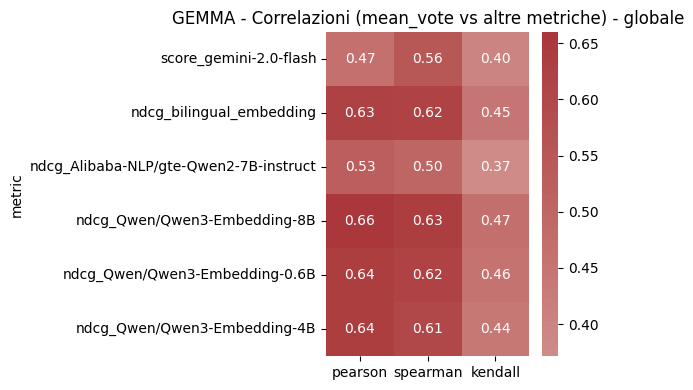

/tmp/ipykernel_644817/2925074205.py:57: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


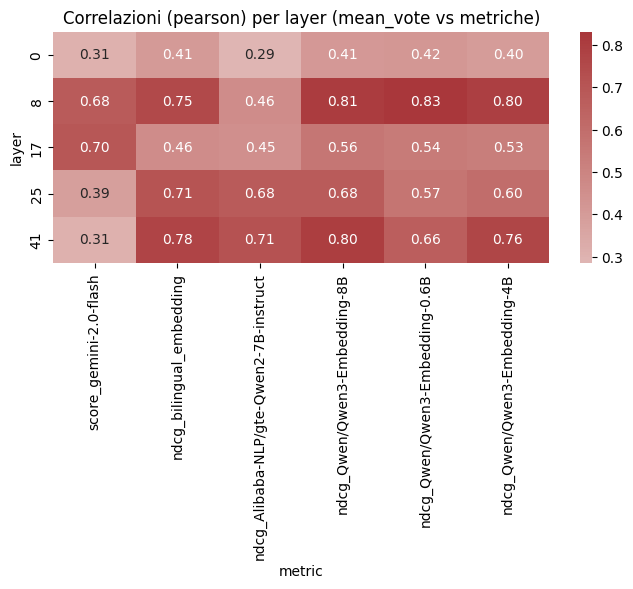

/tmp/ipykernel_644817/2925074205.py:57: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


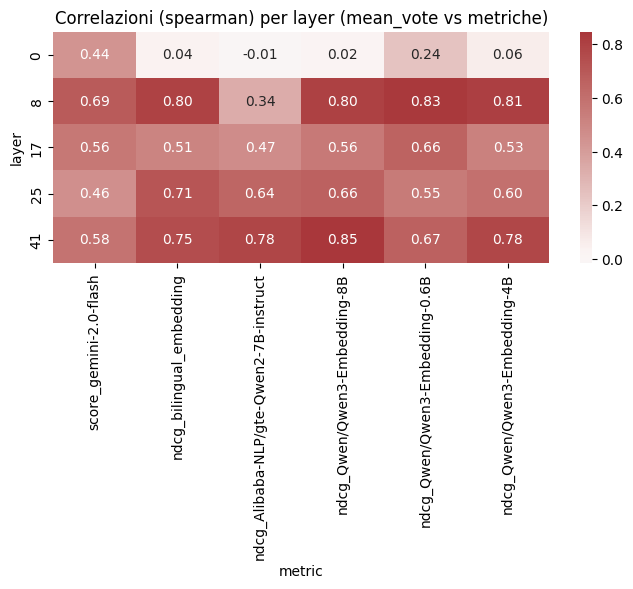

/tmp/ipykernel_644817/2925074205.py:57: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


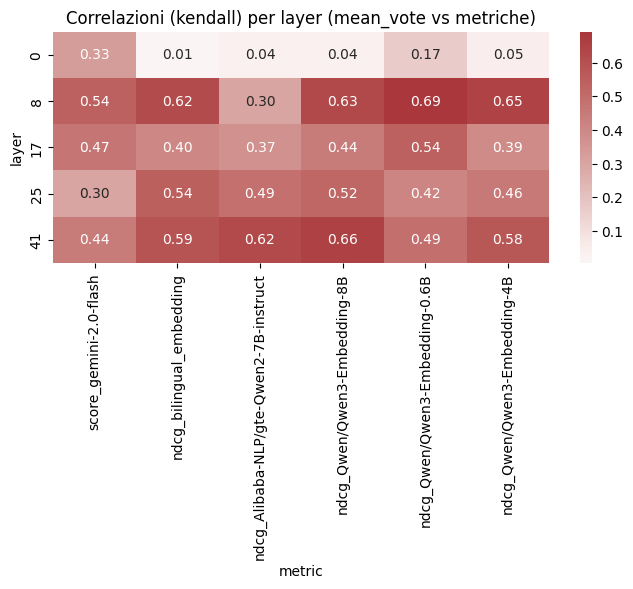

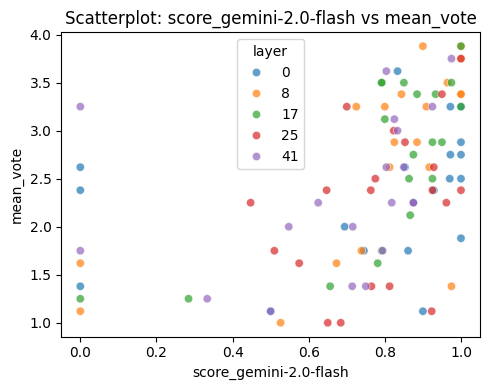

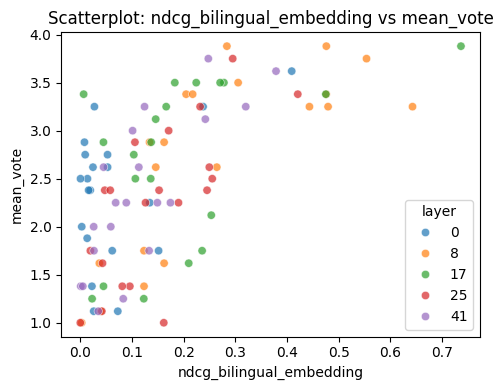

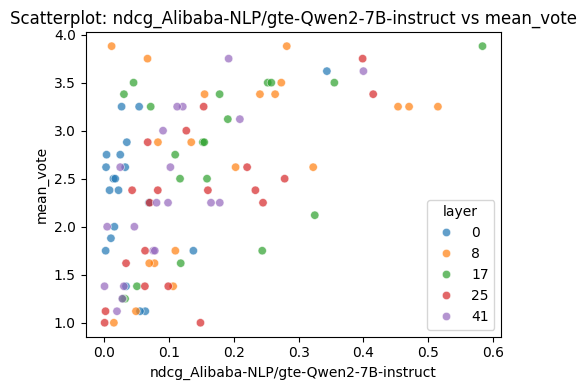

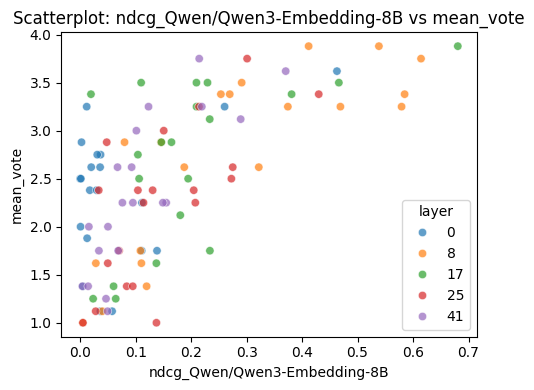

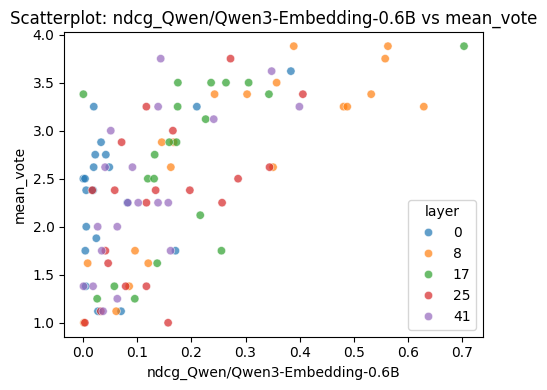

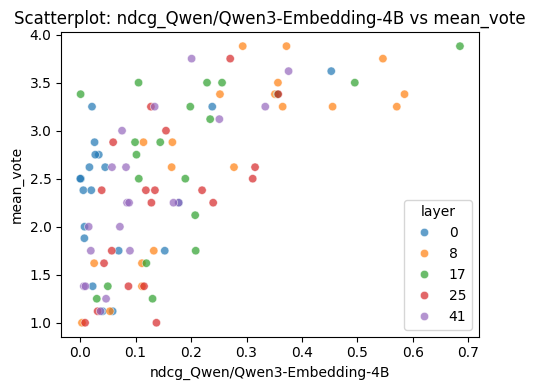

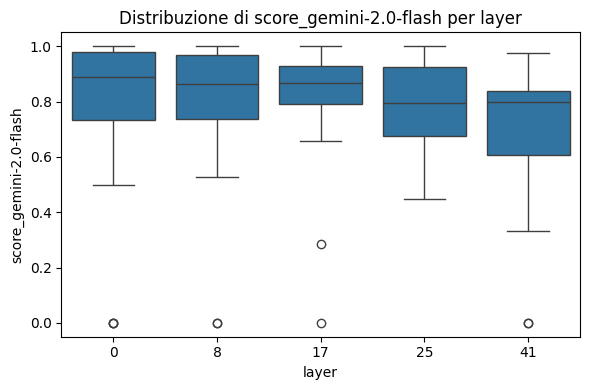

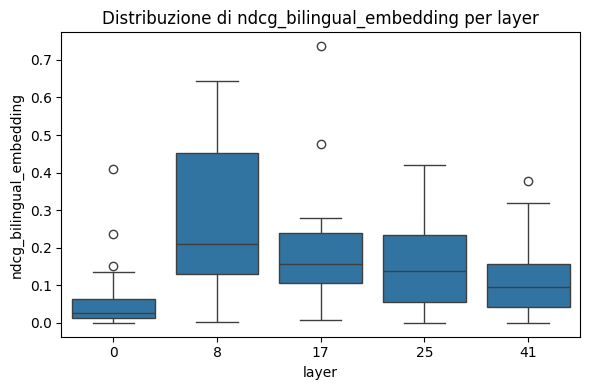

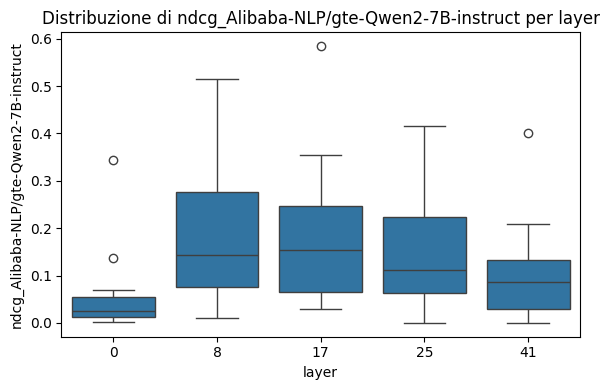

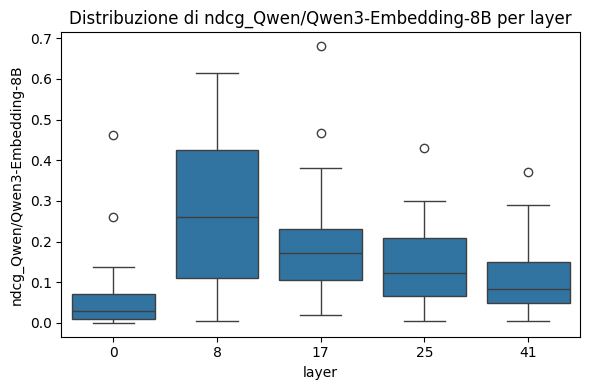

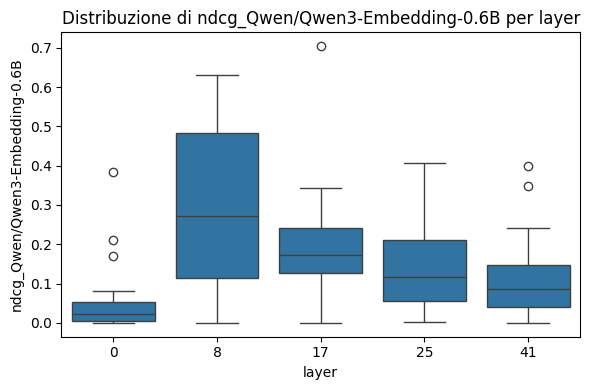

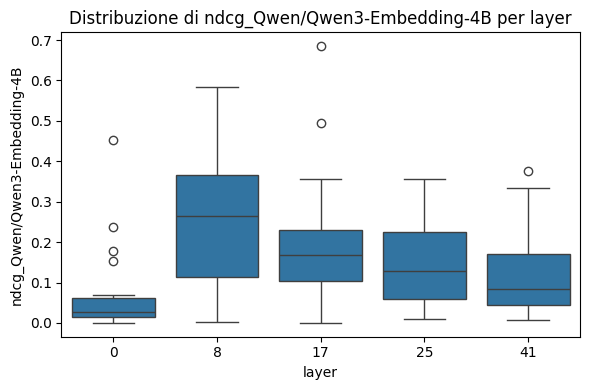

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr, kendalltau

# Assumiamo che il tuo dataframe sia già caricato come df_finale

score_cols = [
    col for col in df_finale.columns
    if col.startswith("ndcg_") or col.startswith("score_")
]
target = "mean_vote"

# 1. HEATMAP DELLE CORRELAZIONI GLOBALE
corrs = []
for col in score_cols:
    mask = df_finale[[target, col]].notnull().all(axis=1)
    if mask.sum() > 0:
        pear = pearsonr(df_finale.loc[mask, target], df_finale.loc[mask, col])[0]
        spear = spearmanr(df_finale.loc[mask, target], df_finale.loc[mask, col]).correlation
        kend = kendalltau(df_finale.loc[mask, target], df_finale.loc[mask, col]).correlation
        corrs.append([col, pear, spear, kend])
corrs_df = pd.DataFrame(corrs, columns=["metric", "pearson", "spearman", "kendall"])
corrs_df.set_index("metric", inplace=True)
plt.figure(figsize=(6, 4))
sns.heatmap(corrs_df, annot=True, cmap="vlag", center=0, fmt=".2f")
plt.title("GEMMA - Correlazioni (mean_vote vs altre metriche) - globale")
plt.tight_layout()
plt.show()

# 2. HEATMAP DELLE CORRELAZIONI PER LAYER
layers = sorted(df_finale["layer"].unique())
for stat in ["pearson", "spearman", "kendall"]:
    layer_corrs = []
    for layer in layers:
        temp = []
        df_layer = df_finale[df_finale["layer"] == layer]
        for col in score_cols:
            mask = df_layer[[target, col]].notnull().all(axis=1)
            if mask.sum() > 0:
                if stat == "pearson":
                    val = pearsonr(df_layer.loc[mask, target], df_layer.loc[mask, col])[0]
                elif stat == "spearman":
                    val = spearmanr(df_layer.loc[mask, target], df_layer.loc[mask, col]).correlation
                else:
                    val = kendalltau(df_layer.loc[mask, target], df_layer.loc[mask, col]).correlation
            else:
                val = None
            temp.append(val)
        layer_corrs.append(temp)
    corr_matrix = pd.DataFrame(layer_corrs, columns=score_cols, index=layers)
    plt.figure(figsize=(8, 3))
    sns.heatmap(corr_matrix, annot=True, cmap="vlag", center=0, fmt=".2f")
    plt.title(f"Correlazioni ({stat}) per layer (mean_vote vs metriche)")
    plt.xlabel("metric")
    plt.ylabel("layer")
    plt.tight_layout()
    plt.show()

# 3. SCATTERPLOT (mean_vote vs ogni metrica)
for col in score_cols:
    plt.figure(figsize=(5, 4))
    sns.scatterplot(data=df_finale, x=col, y=target, hue="layer", palette="tab10", alpha=0.7)
    plt.title(f"Scatterplot: {col} vs mean_vote")
    plt.tight_layout()
    plt.show()

# 4. BOXPLOT DELLE METRICHE PER LAYER
for col in score_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_finale, x="layer", y=col)
    plt.title(f"Distribuzione di {col} per layer")
    plt.tight_layout()
    plt.show()